In [2]:
import numpy as np

In [ ]:
def erreur(x, w, y):
  y_model = model(x, w)

  distance = (y - y_model) **2

  return np.sum(distance)

In [3]:
def erreur(X, Y, W, B):

  M = np.dot(X, W)

  P = M + B

  L = np.mean((Y-P) ** 2)

  return L

In [4]:
X = np.array([
    [2, 3, -2],
    [4, 5, -1],
    [-5, 2, 3],
    [0, 5, 4]
])

In [5]:
X.shape

(4, 3)

In [6]:
Y = np.array([
    [2],
    [5],
    [6],
    [3]
])

In [7]:
Y.shape

(4, 1)

In [8]:
W = np.array([
    [0.02],
    [18],
    [15]
])

In [9]:
W.shape

(3, 1)

In [10]:
B = 0.5

In [11]:
erreur(X, Y, W, B)

8232.7495

In [12]:
params = {"W": W, "B": B}

In [13]:
params['W']

array([[ 0.02],
       [18.  ],
       [15.  ]])

In [44]:
def erreur(X, Y, params):

  info = {}

  M = np.dot(X, params['W'])

  P = M + params['B']

  L = np.mean((Y-P) ** 2)

  info['M'] = M
  info['P'] = P

  info['X'] = X
  info['Y'] = Y



  return L, info

In [15]:
loss, info = erreur(X, Y, params)

In [16]:
loss

8232.7495

In [17]:
info

{'M': array([[ 24.04],
        [ 75.08],
        [ 80.9 ],
        [150.  ]]),
 'P': array([[ 24.54],
        [ 75.58],
        [ 81.4 ],
        [150.5 ]]),
 'X': array([[ 2,  3, -2],
        [ 4,  5, -1],
        [-5,  2,  3],
        [ 0,  5,  4]]),
 'Y': array([[2],
        [5],
        [6],
        [3]])}

In [18]:
W.shape

(3, 1)

In [19]:
W

array([[ 0.02],
       [18.  ],
       [15.  ]])

In [20]:
B

0.5

In [21]:
def gradient(info, params):
  grads = {}

  dL_dP = -2 * (info['Y'] - info['P']) # (4, 1)

  dP_dM = 1

  dM_dW = info['X'].T #(3, 4)


  dL_dW = np.dot(dM_dW, dL_dP) * dP_dM   # (4, 1) * (3, 4)  # (3, 4) (4, 1)
  grads['W'] = dL_dW


  dP_dB = 1

  dL_dB = dL_dP * dP_dB #(4, 1) * 1

  dL_dB = np.sum(dL_dB)

  grads['B'] = dL_dB

  return grads

In [26]:
grads = gradient(info, params)
grads

{'W': array([[ -99.2 ],
        [2617.64],
        [1401.08]]),
 'B': 632.04}

In [23]:
B

0.5

In [24]:
params

{'W': array([[ 0.02],
        [18.  ],
        [15.  ]]),
 'B': 0.5}

In [27]:
grads

{'W': array([[ -99.2 ],
        [2617.64],
        [1401.08]]),
 'B': 632.04}

In [28]:
params["W"] = params["W"] -  0.01 * grads["W"]
params["B"] = params["B"] -  0.01 * grads["B"]

In [29]:
params

{'W': array([[ 1.012 ],
        [-8.1764],
        [ 0.9892]]),
 'B': -5.820399999999999}

In [30]:
new_loss, info = erreur(X, Y, params)

In [31]:
new_loss

1604.6036749200002

In [33]:
learning_rate = 0.01
for p in params:
  params[p] = params[p] - learning_rate * grads[p]

W
B


In [46]:
def train(X, Y, params, epoch, learning_rate):
  errors = []
  for i in range(epoch):

    # forward
    loss, info = erreur(X, Y, params)
    errors.append(loss)
    print(f'Epoch {i+1} .............. loss : {loss}')

    #backward

    grads = gradient(info, params)


    # update
    for p in params:
      params[p] = params[p] - learning_rate * grads[p]

  return params, errors

In [35]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [36]:
Y

array([[2],
       [5],
       [6],
       [3]])

In [37]:
params

{'W': array([[ 1.012 ],
        [-8.1764],
        [ 0.9892]]),
 'B': -5.820399999999999}

In [47]:
params, errors = train(X, Y, params, epoch=10, learning_rate=0.01)

Epoch 1 .............. loss : 418.642019512208
Epoch 2 .............. loss : 132.7375541654032
Epoch 3 .............. loss : 55.10595322352058
Epoch 4 .............. loss : 30.87104990900073
Epoch 5 .............. loss : 21.208720843180906
Epoch 6 .............. loss : 16.026355056999368
Epoch 7 .............. loss : 12.579903243269353
Epoch 8 .............. loss : 10.039007517112244
Epoch 9 .............. loss : 8.090796284512894
Epoch 10 .............. loss : 6.576656396391344


In [49]:
params

{'W': array([[-0.36009278],
        [ 1.49170586],
        [ 0.24553861]]),
 'B': -2.4192449659533164}

In [50]:
errors

[418.642019512208,
 132.7375541654032,
 55.10595322352058,
 30.87104990900073,
 21.208720843180906,
 16.026355056999368,
 12.579903243269353,
 10.039007517112244,
 8.090796284512894,
 6.576656396391344]

In [48]:
import matplotlib.pyplot as plt


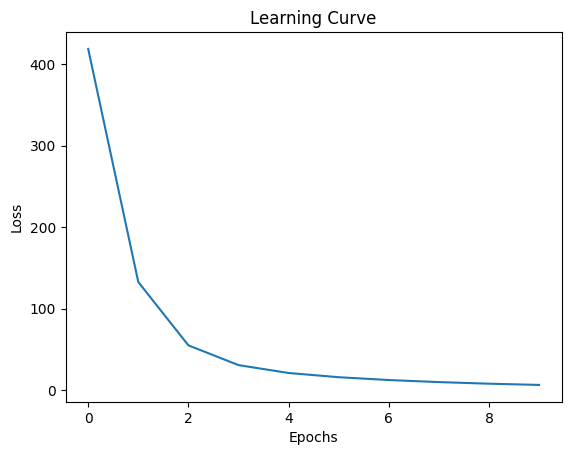

In [51]:
plt.plot(list(range(10)), errors)
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()

In [56]:
def predict(X, params):

  M = np.dot(X, params['W'])

  P = M + params['B']

  return P

In [53]:
prediction = predict(X, params)

In [54]:
prediction

array([[0.84460982],
       [3.35337459],
       [3.10124647],
       [6.02143875]])

In [55]:
Y

array([[2],
       [5],
       [6],
       [3]])

In [59]:
Y.shape

(4, 1)

In [58]:
X

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])